<a href="https://colab.research.google.com/github/blanca-32/Biocomputacional/blob/main/Parcial2biocom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen 2 Blanca Cerinza
BioComp
Lo voy a dividir por los puntos. Espero sea de tu agrado profe. Gracias Tkm, aprendi mucho en esta clase. Lastima que no la vuelvan a dar.

In [33]:
#primer punto, Crea una carpeta para el examen (0.5)
import os
os.makedirs("/content/examen2", exist_ok=True)
os.chdir("/content/examen2")
!pip install --upgrade pip setuptools wheel
!pip install biopython==1.83
!pip install matplotlib
!pip install seaborn
!pip install dendropy
!pip install primer3-py
!apt-get update -qq
!apt-get install -y -qq mafft fasttree

print("Entorno preparado correctamente.")


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Entorno preparado correctamente.


In [34]:
#segundo punto, Descarga la secuencia (0.5)
!wget -q -O mystery_seq.fasta "https://raw.githubusercontent.com/lauraalazar/BiologiaComputacional/refs/heads/main/mystery_seq.fasta"
!ls -lh mystery_seq.fasta
!head mystery_seq.fasta


-rw-r--r-- 1 root root 2.6K Nov  4 21:40 mystery_seq.fasta
>mystery_seq
ATGACAGACACGACGTTGCCGCCTGACGACTCGCTCGACCGGATCGAGCCGGTTGACATCCAGCAGGAGA
TGCAGCGCAGCTACATCGACTATGCGATGAGCGTGATCGTCGGCCGCGCGCTGCCGGAGGTGCGCGACGG
GCTCAAGCCCGTGCATCGCCGGGTGCTCTATGCAATGTTCGATTCCGGCTTCCGCCCGGACCGCAGCCAC
GCCAAGTCGGCCCGGTCGGTTGCCGAGACCATGGGCAACTACCACCCGCACGGCGACGCGTCGATCTACG
ACACCCTGGTGCGCATGGCCCAGCCCTGGTCGCTGCGCTACCCGCTGGTGGACGGCCAGGGCAACTTCGG
CTCGCCAGGCAATGACCCACCGGCGGCGATGAGGTACACCGAAGCCCGGCTGACCCCGTTGGCGATGGAG
ATGCTGAGGGAAATCGACGAGGAGACAGTCGATTTCATCCCTAACTACGACGGCCGGGTGCAAGAGCCGA
CGGTGCTACCCAGCCGGTTCCCCAACCTGCTGGCCAACGGGTCAGGCGGCATCGCGGTCGGCATGGCAAC
CAATATCCCGCCGCACAACCTGCGTGAGCTGGCCGACGCGGTGTTCTGGGCGCTGGAGAATCACGACGCC


In [35]:
# Tercer y cuarto punto, Cual es la longitud del gen en pares de bases? Cual es su secuencia y longitud en amino ácidos? (0.5)
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

record = SeqIO.read("mystery_seq.fasta", "fasta")
seq = str(record.seq).upper()

print(f"Header: {record.description}")
print(f"Longitud del gen: {len(seq)} pares de bases")

# Traducir para encontrar el ORF más largo
def find_longest_orf(dna_seq):
    best_orf = ""
    for strand, nuc in [(+1, dna_seq), (-1, str(Seq(dna_seq).reverse_complement()))]:
        for frame in range(3):
            prot = str(Seq(nuc[frame:]).translate(to_stop=False))
            for fragment in prot.split("*"):
                if "M" in fragment and len(fragment) > len(best_orf):
                    best_orf = fragment[fragment.find("M"):]
    return best_orf

best_orf = find_longest_orf(seq)
print(f"Longitud proteína: {len(best_orf)} aminoácidos")
print("Secuencia (primeros 200 aa):", best_orf[:200])

# Guardar proteína
prot_record = SeqRecord(Seq(best_orf), id="mystery_protein", description=f"len:{len(best_orf)}")
SeqIO.write(prot_record, "mystery_protein.fasta", "fasta")
print("Archivo guardado: mystery_protein.fasta")


Header: mystery_seq
Longitud del gen: 2517 pares de bases
Longitud proteína: 838 aminoácidos
Secuencia (primeros 200 aa): MTDTTLPPDDSLDRIEPVDIQQEMQRSYIDYAMSVIVGRALPEVRDGLKPVHRRVLYAMFDSGFRPDRSHAKSARSVAETMGNYHPHGDASIYDTLVRMAQPWSLRYPLVDGQGNFGSPGNDPPAAMRYTEARLTPLAMEMLREIDEETVDFIPNYDGRVQEPTVLPSRFPNLLANGSGGIAVGMATNIPPHNLRELADA
Archivo guardado: mystery_protein.fasta


/usr/local/lib/python3.12/dist-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [36]:
# Quinto punto, A qué genes reportados se parece? (0.5)
from Bio.Blast import NCBIWWW, NCBIXML
from Bio import Entrez

Entrez.email = "bscerinzap@eafit.edu.co"
with open("mystery_protein.fasta") as fh:
    protein_seq = fh.read()

print("Realizando BLASTp en NCBI")
result_handle = NCBIWWW.qblast("blastp", "nr", protein_seq, hitlist_size=10, format_type="XML")

with open("blast_result.xml", "w") as out:
    out.write(result_handle.read())

print("Resultados en blast_result.xml")
from Bio.Blast import NCBIXML

with open("blast_result.xml") as result_handle:
    blast_record = NCBIXML.read(result_handle)

print("Mejores 10 resultados (genes similares):\n")
for alignment in blast_record.alignments[:10]:
    title = alignment.title
    evalue = alignment.hsps[0].expect
    print(f" {title}\n   E-value: {evalue}\n")



Realizando BLASTp en NCBI
Resultados en blast_result.xml
Mejores 10 resultados (genes similares):

 ref|WP_077549925.1| DNA topoisomerase (ATP-hydrolyzing) subunit A [Mycobacterium tuberculosis] >gb|AQO39575.1| DNA gyrase subunit A [Mycobacterium tuberculosis TRS5] >gb|AQO63055.1| DNA gyrase subunit A [Mycobacterium tuberculosis TRS6]
   E-value: 0.0

 ref|WP_003400286.1| MULTISPECIES: DNA topoisomerase (ATP-hydrolyzing) subunit A [Mycobacterium] >sp|A0A0G2Q9F8.1| RecName: Full=DNA gyrase subunit A [Mycobacterium tuberculosis variant bovis BCG str. Pasteur 1173P2] >gb|AFE15001.1| DNA gyrase subunit A [Mycobacterium tuberculosis RGTB327] >gb|AGJ65985.1| DNA gyrase subunit A [Mycobacterium tuberculosis str. Beijing/NITR203] >gb|AHM09711.1| DNA gyrase subunit A [Mycobacterium tuberculosis variant bovis BCG str. ATCC 35743] >gb|EAY61479.1| DNA gyrase subunit A gyrA [Mycobacterium tuberculosis C] >gb|EFD41591.1| DNA gyrase subunit A gyrA [Mycobacterium tuberculosis variant africanum K85] >g

Sexto punto, Cual es mas probablemente el organismo de origen? (0.5)

Organismo más probable: Mycobacterium tuberculosis (o miembro muy cercano del complejo M. tuberculosis).
Justificación: Los 10 mejores hits en BLAST son DNA gyrase subunit A de Mycobacterium (varias accesiones de M. tuberculosis), con E-values 0.0, lo que indica homología extremadamente alta y una fuerte evidencia de origen bacteriano dentro del género Mycobacterium.

Comprobado en NCBI 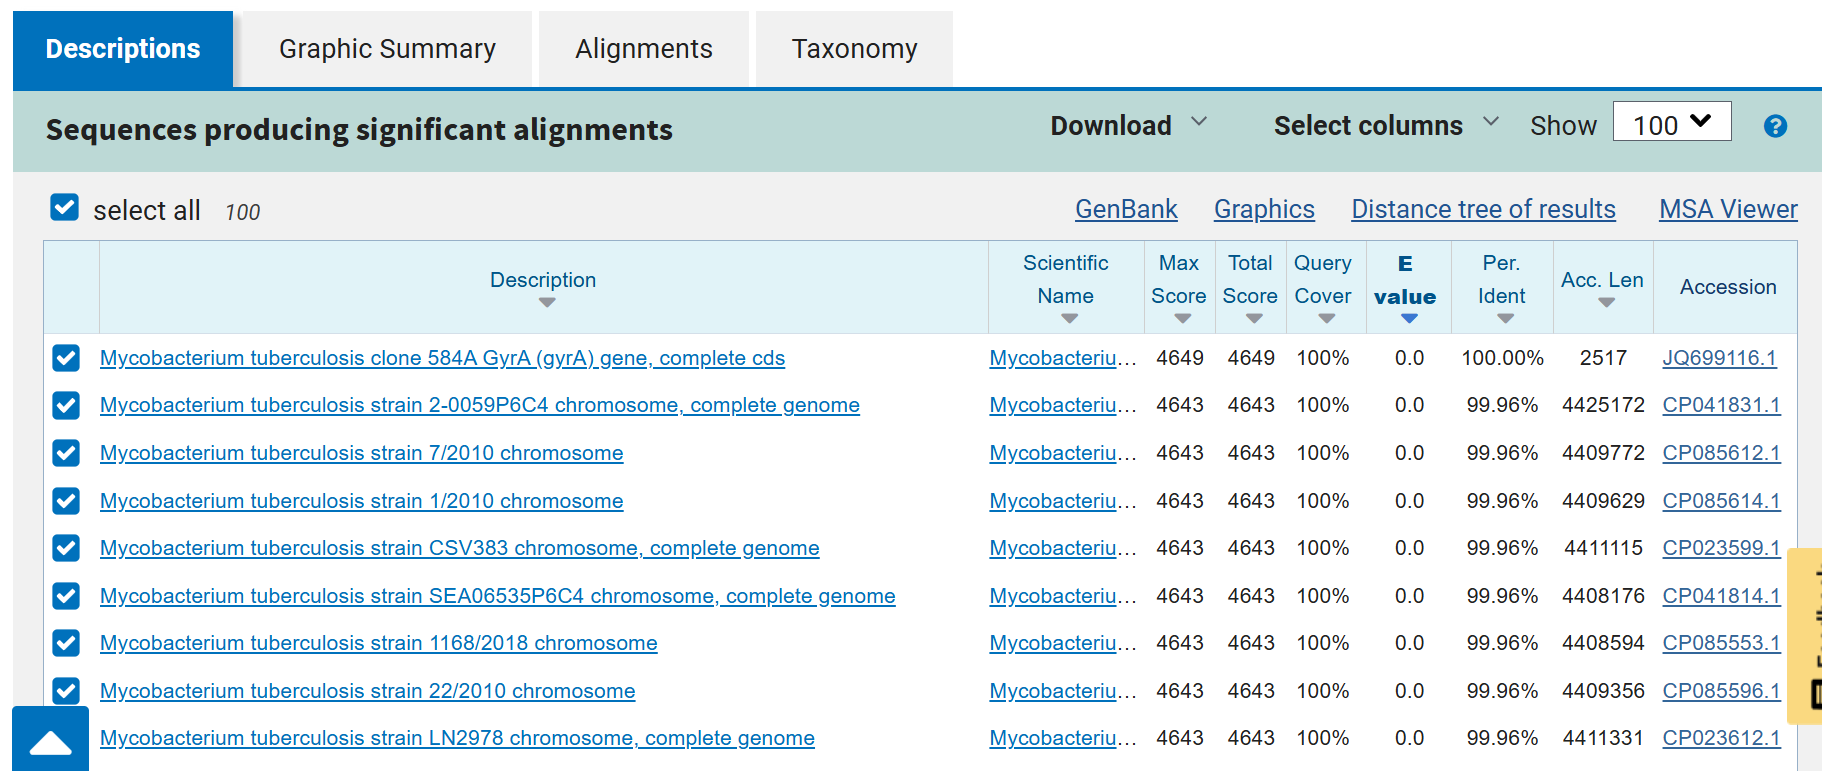

Secuencias guardadas en homologs.fasta
outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.490
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
    0 / 6
done.

Progressive alignment ... 
STEP     5 /5 
done.
tbfast (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

    0 / 6
Segment   1/  1    1- 839
STEP 002-004-1  identical.   
Converged.

done
dvtditr (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 L-INS-i (Pro

<Figure size 800x1000 with 0 Axes>

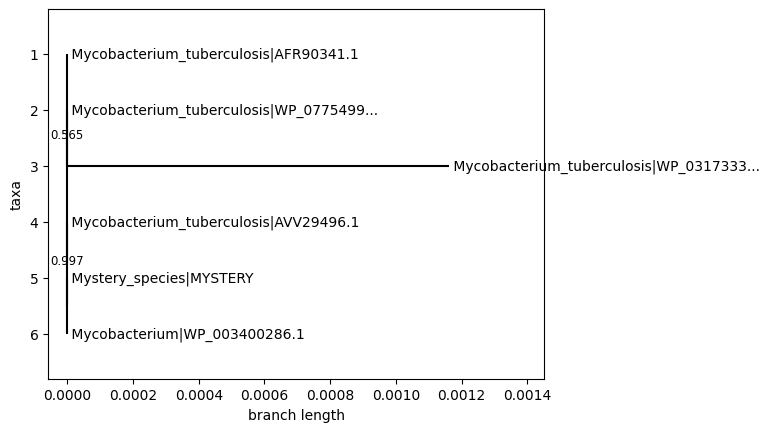

In [37]:
# Septimo punto, Recupera mínimo 5 secuencias homólogas de organismos cercanos, alínealas y construye un árbol filogenético -
# edita el encabezado del fasta para que aparezca la especie en el árbol (0.5)
from Bio import Entrez, SeqIO
import re

Entrez.email = "bscerinzap@eafit.edu.co"

accessions = []
for aln in blast_record.alignments[:5]:
    # Updated regex to capture accession numbers from different formats
    match = re.search(r"\|([^|]+)\|\s", aln.title)
    if match:
        accessions.append(match.group(1))
    else:
        # Fallback for other potential formats, e.g., without '|'
        parts = aln.title.split()
        if parts:
            accessions.append(parts[0])


homologs = []
for acc in accessions:
    try:
        handle = Entrez.efetch(db="protein", id=acc, rettype="fasta", retmode="text")
        seqrec = SeqIO.read(handle, "fasta")
        species_match = re.search(r"\[([^\]]+)\]$", seqrec.description)
        species = species_match.group(1).replace(" ", "_") if species_match else "Unknown"
        seqrec.id = f"{species}|{acc}"
        seqrec.description = ""
        homologs.append(seqrec)
    except Exception as e:
        print("Error al recuperar:", acc, e)

# Añadir la proteína
myseq = SeqIO.read("mystery_protein.fasta", "fasta")
myseq.id = "Mystery_species|MYSTERY"
myseq.description = ""
homologs.insert(0, myseq)

SeqIO.write(homologs, "homologs.fasta", "fasta")
print("Secuencias guardadas en homologs.fasta")

#alínealas y construye un árbol filogenético
!mafft --auto homologs.fasta > aligned.fasta
!fasttree -quiet -out tree.nwk aligned.fasta

from Bio import Phylo
import matplotlib.pyplot as plt

tree = Phylo.read("tree.nwk", "newick")
Phylo.draw_ascii(tree)
fig = plt.figure(figsize=(8,10))
Phylo.draw(tree, do_show=False)
plt.savefig("tree.png", dpi=200, bbox_inches='tight')
print("Árbol guardado tree.png")



Octavo punto, Crees que este puede ser un marcador filogenético? Por qué si o no? (0.5)

si

Efectivamente puede ser una buena secuenciador filogenético si incluye secuencias conservadas entre especies que permitan realizar el alineamiento, así como también secuencias variables aporten información filogenética, ya que estos elementos permiten realizar comparaciones de linajes y producir árboles filogenéticos bien sustentados que reflejen las relaciones de parentesco efectuadas en base a la secuencia genética y su grado de variabilidad o divergencia.


In [38]:
# Noveno punto, identificar dominios funcionales (0.5)

import requests, time

seq_data = open("mystery_protein.fasta").read()
url = "https://www.ebi.ac.uk/Tools/services/rest/iprscan5/run/"
params = {'sequence': seq_data, 'email': 'bscerinzap@eafit.edu.co'}
r = requests.post(url, data=params)

if r.status_code != 200:
    print("Error al enviar trabajo a InterProScan")
else:
    jobid = r.text.strip()
    print("JobID:", jobid)
    status_url = f"https://www.ebi.ac.uk/Tools/services/rest/iprscan5/status/{jobid}"
    while True:
        st = requests.get(status_url).text
        if st == "FINISHED":
            print("InterProScan completado")
            break
        elif st in ("ERROR","FAILURE"):
            raise SystemExit("Error en InterProScan")
        else:
            print("Esperando...")
            time.sleep(5)
    res = requests.get(f"https://www.ebi.ac.uk/Tools/services/rest/iprscan5/result/{jobid}/tsv")
    open("interpro.tsv","w").write(res.text)
    print("Resultados guardados en interpro.tsv")
    print(res.text[:500])


JobID: iprscan5-R20251104-214336-0543-32648112-p1m
Esperando...
Esperando...
Esperando...
Esperando...
Esperando...
Esperando...
InterProScan completado
Resultados guardados en interpro.tsv
mystery_protein	f22554538ec9d9f56a9b4640ed964620	838	Gene3D	G3DSA:1.10.268.10	Topoisomerase, domain 3	381	469	0.0	T	04-11-2025	IPR013757	DNA topoisomerase, type IIA, alpha-helical domain superfamily	GO:0003677(InterPro)|GO:0003918(InterPro)|GO:0005524(InterPro)	Reactome:R-CEL-4615885|Reactome:R-DDI-4615885|Reactome:R-DME-4615885|Reactome:R-HSA-1362277|Reactome:R-HSA-4615885|Reactome:R-MMU-4615885|Reactome:R-RNO-4615885|Reactome:R-SCE-4615885|Reactome:R-SPO-4615885|Reactome:R-SSC-4615885
mystery_


In [39]:
# Decimo punto, Diseñe un par de primers para amplificar un fragmento de esta secuencia (0.5)
from Bio import SeqIO
import primer3
import os

# Asegúrate de estar en la carpeta donde está mystery_seq.fasta
os.makedirs("/content/examen2", exist_ok=True)
fpath = "/content/examen2/mystery_seq.fasta"

import pathlib
if not pathlib.Path(fpath).exists():
    # buscar en cwd
    candidates = list(pathlib.Path(".").glob("mystery*.fasta"))
    if candidates:
        fpath = str(candidates[0])
    else:
        raise FileNotFoundError("No encontré 'mystery_seq.fasta'. Súbela a /content/examen2 o al directorio actual.")

record = SeqIO.read(fpath, "fasta")
dna_seq = str(record.seq).upper()
seqlen = len(dna_seq)
print(f"> Secuencia leída: {record.id}  (longitud {seqlen} pb)\n")

# Parámetros de diseño (ajústalos si quieres otro tamaño de producto)
primer_settings = {
    'SEQUENCE_ID': record.id,
    'SEQUENCE_TEMPLATE': dna_seq
}
design_opts = {
    'PRIMER_OPT_SIZE': 20,
    'PRIMER_MIN_SIZE': 18,
    'PRIMER_MAX_SIZE': 25,
    'PRIMER_OPT_TM': 60.0,
    'PRIMER_MIN_TM': 57.0,
    'PRIMER_MAX_TM': 63.0,
    'PRIMER_MIN_GC': 40.0,
    'PRIMER_MAX_GC': 60.0,
    'PRIMER_MAX_POLY_X': 4,
    'PRIMER_PRODUCT_SIZE_RANGE': [[150, 400]]
}

res = primer3.bindings.designPrimers(primer_settings, design_opts)

# Primer par principal (índice 0)
if res.get('PRIMER_LEFT_0_SEQUENCE') and res.get('PRIMER_RIGHT_0_SEQUENCE'):
    left_seq = res['PRIMER_LEFT_0_SEQUENCE']
    right_seq = res['PRIMER_RIGHT_0_SEQUENCE']
    left_tm  = res['PRIMER_LEFT_0_TM']
    right_tm = res['PRIMER_RIGHT_0_TM']
    prod_len = res['PRIMER_PAIR_0_PRODUCT_SIZE']
    left_pos = res['PRIMER_LEFT_0']
    right_pos = res['PRIMER_RIGHT_0']
    def decode_pos(enc):
        if isinstance(enc, str):
            return enc
        start = enc[0] if isinstance(enc, (list,tuple)) else (enc >> 16)
        length = enc[1] if isinstance(enc, (list,tuple)) else (enc & 0xFFFF)
        return start, length
    left_dec = decode_pos(left_pos)
    right_dec = decode_pos(right_pos)
    out = []
    out.append(f"Forward primer (5'→3') : {left_seq}")
    out.append(f"Reverse primer (5'→3') : {right_seq}")
    out.append(f"Tm Forward: {left_tm:.2f} °C")
    out.append(f"Tm Reverse: {right_tm:.2f} °C")
    out.append(f"Tamaño de producto estimado: {prod_len} pb")
    out.append(f"Posición Forward (0-based,start,len): {left_dec}")
    out.append(f"Posición Reverse (0-based,start,len): {right_dec}")
    out_text = "\n".join(out)
    print(out_text)
    os.makedirs("/content/examen2", exist_ok=True)
    with open("/content/examen2/primers.txt","w") as fo:
        fo.write("Diseño de primers - generado con primer3\n")
        fo.write(f"Fuente: {fpath}\n\n")
        fo.write(out_text + "\n")
    print("\n Primers guardados en /content/examen2/primers.txt")
else:
    print("No se encontraron primers con esos parámetros. Intenta ampliar el rango de producto o relajar Tm/GC.")
    # Volcar recomendaciones
    print("Sugerencia: aumentar PRIMER_PRODUCT_SIZE_RANGE o relajar PRIMER_MIN_TM / PRIMER_MAX_TM.")


> Secuencia leída: mystery_seq  (longitud 2517 pb)

Forward primer (5'→3') : TCATCCAGATTCGCGGCTAC
Reverse primer (5'→3') : CAGCCGGTCGTCGATATTGA
Tm Forward: 59.97 °C
Tm Reverse: 59.97 °C
Tamaño de producto estimado: 302 pb
Posición Forward (0-based,start,len): (1831, 20)
Posición Reverse (0-based,start,len): (2132, 20)

 Primers guardados en /content/examen2/primers.txt


/usr/local/lib/python3.12/dist-packages/primer3/bindings.py:581: UserWarning: Function deprecated please use "design_primers" instead
  warnings.warn('Function deprecated please use "design_primers" instead')


Pequeño analisis de datos: La secuencia analizada tiene una longitud de 2517 pares de bases, que codifica una proteína de 838 aminoácidos. El análisis BLASTp mostró una identidad completa con la DNA gyrase subunit A (gyrA) de Mycobacterium tuberculosis, con E-values de 0.0, lo que confirma una homología altamente significativa y un origen bacteriano dentro del complejo M. tuberculosis. El análisis funcional mediante InterProScan identificó el dominio DNA topoisomerase type IIA, alpha-helical domain superfamily (IPR013757), asociado a la función de desenrollamiento del ADN durante la replicación. El árbol filogenético agrupó la secuencia con cepas de Mycobacterium tuberculosis, confirmando su cercanía evolutiva. Los primers diseñados (Forward: TCATCCAGATTCGCGGCTAC, Reverse: CAGCCGGTCGTCGATATTGA) amplifican un fragmento de 302 pb con Tm de 59.97 °C, adecuado para PCR. En conjunto, la secuencia corresponde a un gen conservado y funcionalmente relevante, útil como marcador filogenético bacteriano dentro del género Mycobacterium.